In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import os

path ="/content/drive/MyDrive/braille/train/"
files = os.listdir(path)[:11]
print(files)

classes={'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10}

['G', 'D', 'C', 'I', 'F', 'E', 'A', 'J', 'H', 'B', 'K']


In [ ]:
import cv2
x=[]
y=[]

for cl in classes:
  pth = path+cl
  for img_name in os.listdir(pth):
    img = cv2.imread(pth+"/"+img_name,0)
    img = cv2.resize(img, (64, 64))
    x.append(img)
    y.append(classes[cl])

print("Successful")

Successful


In [ ]:
pd.Series(y).value_counts()

9     145
6     140
5     120
1     115
2     105
3     101
4      91
0      84
7      83
8      69
10     57
dtype: int64

In [ ]:
x[0].shape

(64, 64)

In [ ]:
x=np.array(x)
y=np.array(y)
#print(type(x))

In [ ]:
#plt.imshow(x[41],cmap="gray")
#print(y[0])

In [ ]:
x.shape

(1110, 64, 64)

In [ ]:
x_new = x.reshape(len(x),-1)
#print(x_new.shape)
#print(y.shape)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y, test_size=0.20, random_state=10)

In [ ]:
x = np.array(x).reshape(-1, 64, 64, 1)
y = np.array(y)

In [ ]:
print(x.shape)

(1110, 64, 64, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Epoch 1/10
28/28 [==============================] - 6s 180ms/step - loss: 1.7235 - accuracy: 0.4471 - val_loss: 0.4711 - val_accuracy: 0.9144
Epoch 2/10
28/28 [==============================] - 3s 124ms/step - loss: 0.1716 - accuracy: 0.9718 - val_loss: 0.0198 - val_accuracy: 0.9955
Epoch 3/10
28/28 [==============================] - 3s 121ms/step - loss: 0.0222 - accuracy: 0.9944 - val_loss: 0.0455 - val_accuracy: 0.9910
Epoch 4/10
28/28 [==============================] - 4s 159ms/step - loss: 0.0241 - accuracy: 0.9966 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 5/10
28/28 [==============================] - 4s 130ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/10
28/28 [==============================] - 3s 125ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/10
28/28 [==============================] - 3s 124ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 

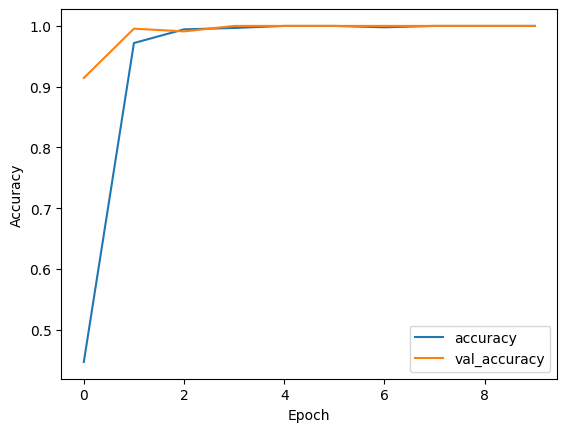

7/7 [==============================] - 0s 54ms/step - loss: 0.0014 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
x = np.array(x).reshape(-1, 64, 64, 1)
y = np.array(y)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=10)

x_train = xtrain / 255.0
x_test = xtest / 255.0


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(11, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, ytrain, epochs=10, validation_data=(x_test, ytest))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(x_test, ytest)
print('Test accuracy:', test_acc)

model.save('braille_classifier.h5')


In [ ]:
import pickle

In [ ]:
with open('braille.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
model.save('braille_classifier.h5')

In [ ]:
decode = {0:'A', 1:'B',2:'C',3:'D', 4:'E', 5:'E', 6:'F',7:'G', 8:'H', 9:'I', 10:'J', 11:'K'}
img = cv2.imread('//content/E2 - Copy - Copy.jpeg', 0)
img = cv2.resize(img, (64, 64))
img = np.expand_dims(img, axis=-1) # add a new dimension to the image
img = img / 255.0 # normalize the pixel values
#plt.imshow(img[:,:,0], cmap='gray') # plot the image
prediction = model.predict(np.array([img]))[0] # make a prediction
decoded_prediction = decode[np.argmax(prediction)] # decode the prediction
print(decoded_prediction) # print the decoded prediction


1/1 [==============================] - 0s 288ms/step
E
